In [1]:
cd ~/Dropbox/GitHub/reflFMM

/Users/sak/Dropbox/GitHub/reflFMM


In [2]:
%load_ext autoreload
%autoreload 2

In [37]:
from pykonal_refl import *

In [4]:
import bokeh.plotting as bp
from bokeh.io import output_notebook, curdoc, output_file
output_notebook()

Loading BokehJS ...

In [5]:
#read the icebottom reflection and water bottom reflection data
# 2 col: x=offset (m), t=twtt (s)
waterobs=np.genfromtxt("42_water.csv", delimiter=",", skip_header=1)
iceobs=np.genfromtxt("42_ice.csv", delimiter=",", skip_header=1)
#print(waterobs)

In [6]:
p1=bp.figure()
p1.circle(waterobs[:,0],waterobs[:,1])
p1.circle(iceobs[:,0],iceobs[:,1])

bp.show(p1)
#p1.circle(np.linspace(-2560, 2560, num=512), xx)

In [7]:
#  create a simple ice model - 1km  of  solid ice - no water
icemod=ice_mod()

In [25]:
#icemod = ice_mod()
#icelay = make_nodes(icemod, 0.61, 0.55)
#watermod = water_mod(0.61, 0.55)
#
#  modify  ice model to include  an ice bottom at  610m (.55deg dip) and water bottom at  660m (-3deg dip)
# vel = new ice shelf model
# icelay = ice shelf bottom
# waterlay = new water bottom layer
vel, icelay, waterlay = make_vel(icemod, 0.61, 0.55, 0.7, 0)

In [26]:
modx_ice, modt_ice = calc_refl(icemod, 0, 0, icelay)
# calc twtt to the water bottom through  the "vel" model
modx_water, modt_water=calc_refl(vel,  0, 0, waterlay)


In [27]:
p1=bp.figure()
p1.circle(waterobs[:,0],waterobs[:,1])
p1.circle(iceobs[:,0],iceobs[:,1])
p1.cross(modx_ice*1000, modt_ice)
p1.cross(modx_water*1000,  modt_water)
bp.show(p1)

In [11]:
# calc error between modeled and observed twtt
# [0.7, 0] is the water bottom
# 0.6, 0 is the ice bott
# icemod is the vel model
# 0, 0 is the shot loc (x, z)
# waterobs is observed offset and t
# True is whether to print all geophones or just the total err
tt_err_waterbot([0.7, 0], 0.6, 0, icemod, 0,  0, waterobs[:,0], waterobs[:,1], True)

235.0 0.3795 279 0.45370946096556886 -0.07420946096556885
225.0 0.37925000000000003 278 0.4532401979797114 -0.07399019797971135
215.0 0.3785 277 0.45279027931119187 -0.07429027931119186
205.0 0.37825000000000003 276 0.45235977497857716 -0.07410977497857713
195.0 0.37875000000000003 275 0.4519487522429095 -0.07319875224290945
185.0 0.37875000000000003 274 0.45155727556291675 -0.07280727556291672
175.0 0.3785 273 0.4511854065461496 -0.07268540654614958
165.0 0.37825000000000003 272 0.450833203901111 -0.07258320390111095
155.0 0.378 271 0.45050072338781216 -0.07250072338781216
145.0 0.37875000000000003 270 0.4501880177826505 -0.07143801778265046
135.0 0.37875000000000003 269 0.4498951368360072 -0.07114513683600715
125.0 0.37625000000000003 268 0.44962212723350575 -0.07337212723350572
115.0 0.379 267 0.4493690325471521 -0.0703690325471521
105.0 0.3795 266 0.44913589319227004 -0.06963589319227004
95.0 0.37975000000000003 265 0.44892274634012974 -0.06917274634012971
85.0 0.37975000000000003 

0.2031922518382114

In [28]:
# calc error between modeled and observed twtt for the ice bottom refl
tt_err([0.6044, 0.488], icemod, 0, 0, iceobs[:,0],  iceobs[:,1], disp=True)

235.0 0.3265 279 0.3241048635436811 0.0023951364563188915
225.0 0.32625 278 0.323583626803899 0.0026663731961009685
215.0 0.326 277 0.32309012269684034 0.002909877303159669
205.0 0.3255 276 0.32262322964110735 0.0028767703588926663
195.0 0.325 275 0.3221816434949243 0.0028183565050757253
185.0 0.32475 274 0.32176405855681683 0.002985941443183149
175.0 0.3245 273 0.32136933038813853 0.0031306696118614807
165.0 0.324 272 0.32099658468189457 0.00300341531810544
155.0 0.3235 271 0.3206452497561249 0.002854750243875104
145.0 0.32375 270 0.3203150185121749 0.0034349814878250617
135.0 0.323 269 0.32000577058053437 0.002994229419465644
125.0 0.32275 268 0.3197174915316744 0.00303250846832559
115.0 0.3225 267 0.3194502133282033 0.003049786671796728
105.0 0.32225 266 0.3192039814352205 0.0030460185647794846
95.0 0.3225 265 0.31897884144400507 0.003521158555994941
85.0 0.322 264 0.3187748352416306 0.0032251647583694254
75.0 0.32125 263 0.31859199990532594 0.00265800009467404
65.0 0.321 262 0.3184

0.0004310790744688601

In [29]:
# estimate best ice bottom
# tt_err - returns the err between model and obs
# bounds - range of depths (0.4-0.8) and dips (-8->8)
# mutation - something
# args - rest of the things tt_err needs
differential_evolution(tt_err, bounds=[(0.4, 0.8),  (-8, 8)], mutation=(0.5,1.5), args=(icemod, 0, 0, iceobs[:,0], iceobs[:,1]))



z= 0.5280239088958186 ang= -6.15098404254106 err= 0.09353249868108736
z= 0.7459211960593725 ang= 2.4327919085888983 err= 0.9238023371881884
z= 0.7033027291634765 ang= -1.4593952870243037 err= 0.6939277057363122
z= 0.6922615902746643 ang= 4.33274595538917 err= 0.5225631783699799
z= 0.6542178483108798 ang= -0.9832898105223595 err= 0.16468785431367586
z= 0.7957357341127825 ang= -7.305702559538492 err= 1.2098637933799212
z= 0.44738778824794184 ang= 0.8683233092746665 err= 0.34573389229986085
z= 0.5647351935691635 ang= 1.2729035063798424 err= 0.0276142655161862
z= 0.7266134879377957 ang= -0.25270235744998804 err= 0.8179420397480321
z= 0.42465303135633714 ang= -4.722129679264436 err= 0.45601274435630457
z= 0.5165609671607575 ang= 6.9001202577252805 err= 0.1250833656946113
z= 0.7075560176876885 ang= -7.5686631745064625 err= 0.5828094192573414
z= 0.7574673565741057 ang= -6.439123202826132 err= 0.9759565109293606
z= 0.4850657636656866 ang= -5.6119511179949 err= 0.20995426090818717
z= 0.59476443

z= 0.7885299646705695 ang= -2.319745825288212 err= 1.1922727212912694
z= 0.4530540154290847 ang= 7.924396648122784 err= 0.3399768353878104
z= 0.6343512945590783 ang= -0.4500562414443703 err= 0.0501276212561326
z= 0.619163217233229 ang= -1.4384621988959863 err= 0.006697279073199777
z= 0.640719193303853 ang= 0.5118406157922415 err= 0.07857154773460634
z= 0.5896858891389103 ang= 5.22752740999805 err= 0.007481021570473468
z= 0.605592970891366 ang= -1.4459308234996264 err= 0.0003454565516318806
z= 0.5282003497011711 ang= 2.619091579361587 err= 0.08887507993143544
z= 0.640719193303853 ang= 0.5118406157922415 err= 0.07857154773460634
z= 0.5088249902324478 ang= 1.4039777761413497 err= 0.1358521592550441
z= 0.5793986407556007 ang= 1.6263047644212314 err= 0.012635219651592347
z= 0.5800118039033183 ang= -3.6654484869227195 err= 0.012560940163883339
z= 0.6269603411666624 ang= 0.9506797222771617 err= 0.02227734717054599
z= 0.6624259928380277 ang= -0.21793030374019917 err= 0.23373151487688756
z= 0.6

z= 0.6124050340207745 ang= -1.3917443088285584 err= 0.00045391383536403024
z= 0.6056240273665535 ang= -4.331750138967558 err= 0.0008115867720730523
z= 0.6114891502444171 ang= 2.258109975805077 err= 0.00023680895573978769
z= 0.584511214290101 ang= -1.4514580971768183 err= 0.008803731408472746
z= 0.609114378850333 ang= 0.10741545780610195 err= 1.0941970182900377e-05
z= 0.609559175677338 ang= 4.508262737397487 err= 0.000412223801730429
z= 0.6068250708058109 ang= -0.37757432169352256 err= 0.0001795853592764971
z= 0.6086121675124556 ang= 0.3916564304333505 err= 4.084349555384463e-05
z= 0.5970433024223896 ang= -3.5092032285079657 err= 0.0026204267283017808
z= 0.5817301089641607 ang= 1.1735976455896324 err= 0.010959159556583208
z= 0.6092286233030193 ang= -0.3780360696591103 err= 1.0943321311110438e-05
z= 0.6101072701684445 ang= -0.8334943042607268 err= 3.255872412572638e-05
z= 0.6102061872984867 ang= -1.0341168709255015 err= 4.318953231036728e-05
z= 0.5639627610540178 ang= -0.2628562437244559

z= 0.6069376420183745 ang= 0.17136698113996296 err= 0.0001795753498548778
z= 0.6111299332800257 ang= 0.19152137511869327 err= 0.00017110816348807573
z= 0.6106960600945268 ang= -1.5734050579049867 err= 8.755524460803329e-05
z= 0.6105866606940112 ang= 0.6346099499600086 err= 1.1182986678367752e-05
z= 0.6101310374449535 ang= -1.4528272260129427 err= 8.517541299066454e-05
z= 0.6084252045040803 ang= 1.0252831678256022 err= 5.5304386524757084e-05
z= 0.607249446153015 ang= 1.8779245376281928 err= 0.00016196234645221512
z= 0.6109988792990529 ang= -0.9057559759049765 err= 3.269875334334497e-05
z= 0.6107597645892718 ang= 1.0161584637848389 err= 2.4378235007256422e-05
z= 0.6100143103296762 ang= 0.19961153108664043 err= 1.610145753676351e-05
z= 0.6074505101689176 ang= 0.47451256791552865 err= 9.843966207565535e-05
z= 0.6123660795687982 ang= 0.7138884004697097 err= 0.0004404654431894395
z= 0.6101265636677078 ang= 0.36160575204280576 err= 1.5949865195327867e-05
z= 0.6109421305351248 ang= -0.15262452

z= 0.6105233857141878 ang= 0.8427110572738243 err= 1.817633325150235e-05
z= 0.6095602632355934 ang= -0.27128785644147424 err= 1.0941970183319998e-05
z= 0.6088501975943122 ang= -0.4101164618587845 err= 4.093187853415852e-05
z= 0.6101453910446781 ang= 1.8408764857616298 err= 7.244141401714993e-05
z= 0.6078243838573819 ang= -0.6684421474517386 err= 0.00010802990286111594
z= 0.6088856491156098 ang= 0.17448710562666747 err= 4.079578022726268e-05
z= 0.6071294046543985 ang= -0.17051022708489239 err= 9.707546780497607e-05
z= 0.6091879394461103 ang= -0.17535610320285588 err= 1.0941970182900377e-05
z= 0.6084494774929671 ang= 0.18770330321939 err= 4.079578022726268e-05
z= 0.6088019464765372 ang= -0.28075000752067325 err= 4.0795780184690064e-05
z= 0.6085227833187193 ang= 0.13154002410113108 err= 4.079578022726268e-05
z= 0.6081148297653782 ang= 0.39131977538814766 err= 4.084349555384463e-05
z= 0.6085289196282415 ang= 0.6346099499600086 err= 4.508042209536292e-05
z= 0.6081998333107175 ang= -0.901440

z= 0.6089759009877294 ang= 1.7436270950139097 err= 9.238123566568081e-05
z= 0.6094860289882365 ang= 0.43174753510532327 err= 1.0752530448998809e-05
z= 0.6076111422058683 ang= 0.1380411772389536 err= 9.707546780497607e-05
z= 0.6089864772757744 ang= 0.9458068311218142 err= 5.1771111637585186e-05
z= 0.6094563898520509 ang= 0.730913237716754 err= 1.5056708094499317e-05
z= 0.6089570795127102 ang= 0.6123720203498486 err= 4.508042209536292e-05
z= 0.6094563898520509 ang= 0.730913237716754 err= 1.5056708094499317e-05
z= 0.6091989279788205 ang= -0.07629579347489823 err= 1.0941970182900377e-05
z= 0.6085698948834669 ang= 0.46510122182264624 err= 4.1403493301432976e-05
z= 0.608978317778394 ang= 0.637895614621586 err= 4.688836407903522e-05
z= 0.6097767397114023 ang= 1.31749375176158 err= 3.268248112606026e-05
z= 0.608858791866159 ang= -0.5381225786585002 err= 4.446946447261708e-05
z= 0.609441682219199 ang= 0.5883453950789939 err= 1.1776608265439506e-05
z= 0.6098553624016564 ang= 1.120073872097521 er

z= 0.6098095122700931 ang= 0.825839705897728 err= 1.71581038098073e-05
z= 0.6093635303278895 ang= 0.3525151411241225 err= 1.0938993763209946e-05
z= 0.6095058838152817 ang= 0.6097362496119381 err= 1.1776641770977748e-05
z= 0.6098098096335702 ang= 0.6270602247442341 err= 1.1776641770977748e-05
z= 0.6093148358435838 ang= 0.1510777590777046 err= 1.0941970182900377e-05
z= 0.6098930200605017 ang= 0.6890110421085698 err= 1.3254586682069083e-05
z= 0.6096064086966041 ang= 0.3599844747686589 err= 1.092493489256789e-05
z= 0.6098780497883836 ang= 0.4554964730591369 err= 1.0606876380118789e-05
z= 0.6094774456071775 ang= 0.5848680619495763 err= 1.1776608265439506e-05
z= 0.60919367885302 ang= 0.268389033120517 err= 1.0941970172091519e-05
z= 0.6101504396023542 ang= 0.15707054204989568 err= 1.610145753676351e-05
z= 0.6103628435634164 ang= 0.10528281447703947 err= 1.610145753676351e-05
z= 0.6097454178205408 ang= 0.5435639173487203 err= 1.0917754113432809e-05
z= 0.6104923874042542 ang= 0.761365714792074 

z= 0.6098299869088378 ang= 0.4910337354200909 err= 1.0569562110304604e-05
z= 0.6102677112256818 ang= 0.5390600245049448 err= 1.1579050756636065e-05
z= 0.6099212257363652 ang= 0.5548977262697186 err= 1.0917754414969579e-05
z= 0.6099481744727928 ang= 0.4766758491812002 err= 1.0606876380118789e-05
z= 0.6096796298551371 ang= 0.4752812333151777 err= 1.0606876380118789e-05
z= 0.6101421666073604 ang= 0.5171247298969917 err= 1.2429761310251903e-05
z= 0.6098274833807126 ang= 0.4289347548850255 err= 1.0752530448998809e-05
z= 0.6099106498606903 ang= 0.5058029965025934 err= 1.0569562111317487e-05
z= 0.6101411540947494 ang= 0.41797401763048647 err= 1.4838495299347434e-05
z= 0.6096676774252453 ang= 0.4512174499525603 err= 1.0606876380118789e-05
z= 0.6093635303278895 ang= 0.5380304269328793 err= 1.0917754113432809e-05
z= 0.6098580785944003 ang= 0.4390573433980549 err= 1.0752530448998809e-05
z= 0.6100899905082457 ang= 0.5150070283683608 err= 1.2429761310251903e-05
z= 0.6102031618517237 ang= 0.42999833

     fun: 1.0569562110304604e-05
 message: 'Optimization terminated successfully.'
    nfev: 843
     nit: 27
 success: True
       x: array([0.60990663, 0.4937603 ])

In [34]:
#vel, icelay, waterlay = make_vel(icemod, 0.6044, 0.488, 0.7, 0)
icemod = ice_mod()
icelay = make_nodes(icemod, 0.6099, 0.4937)
modx_ice, modt_ice = calc_refl(icemod, 0, 0, icelay)

In [35]:
p1=bp.figure()
p1.circle(waterobs[:,0],waterobs[:,1])
p1.circle(iceobs[:,0],iceobs[:,1])
p1.cross(modx_ice*1000, modt_ice)
p1.cross(modx_water*1000,  modt_water)
bp.show(p1)

In [44]:
# using ice bottom from above, estimate water bottom
# 1 create a vel model with correct ice, infinite water
watermod = water_mod(icemod, 0.61, 0.4937)
# 2 try a water bottom
tmpvel, icelay, waterlay = make_vel(watermod, 0.61, 0.4937, 0.7, 0)
modx_water, modt_water = calc_refl(watermod, 0, 0, waterlay)

In [45]:
p1=bp.figure()
p1.circle(waterobs[:,0],waterobs[:,1])
p1.circle(iceobs[:,0],iceobs[:,1])
p1.cross(modx_ice*1000, modt_ice)
p1.cross(modx_water*1000,  modt_water)
bp.show(p1)

In [50]:
tt_err_waterbot([0.7, 0], 0.61, 0.4937, watermod, 0,  0, waterobs[:,0], waterobs[:,1], True)

235.0 0.3795 279 0.4449194708970793 -0.06541947089707928
225.0 0.37925000000000003 278 0.444548632736369 -0.06529863273636899
215.0 0.3785 277 0.4442156778461161 -0.0657156778461161
205.0 0.37825000000000003 276 0.4439146207461915 -0.06566462074619145
195.0 0.37875000000000003 275 0.44363086587215045 -0.06488086587215042
185.0 0.37875000000000003 274 0.44334341410466094 -0.0645934141046609
175.0 0.3785 273 0.44303833726479314 -0.06453833726479313
165.0 0.37825000000000003 272 0.4427199646748279 -0.06446996467482785
155.0 0.378 271 0.44240215570333247 -0.06440215570333246
145.0 0.37875000000000003 270 0.4420958469574534 -0.06334584695745338
135.0 0.37875000000000003 269 0.4418064793563189 -0.06305647935631886
125.0 0.37625000000000003 268 0.4415361052060549 -0.06528610520605488
115.0 0.379 267 0.4412853394430528 -0.06228533944305281
105.0 0.3795 266 0.44105433603811817 -0.06155433603811816
95.0 0.37975000000000003 265 0.44084314348683296 -0.061093143486832924
85.0 0.37975000000000003 26

0.15579410774157537

In [47]:
differential_evolution(tt_err_waterbot, bounds=[(0.61, 0.8),  (-8, 8)], args=(0.61, 0.4937, watermod, 0, 0, waterobs[:,0],  waterobs[:,1]))


z= 0.6855140358015497 ang= 4.454013102990382 err= 0.05721641945250458
z= 0.6401116565594355 ang= 4.99088717280268 err= 0.05094651173962349
z= 0.7872288195915523 ang= -6.00491395390965 err= 1.2495738006896637
z= 0.6725916651260905 ang= -5.595409412966815 err= 0.005993794735215777
z= 0.7144887718035393 ang= 0.7292995306568404 err= 0.28179756136072437
z= 0.6899208057985134 ang= 7.087576055197186 err= 0.05114366966969444
z= 0.6556314839571811 ang= -1.3484363889777065 err= 0.0015637648785178883
z= 0.7344065271916718 ang= -7.351796933438213 err= 0.34314998504981614
z= 0.776731276458588 ang= 3.553738413985924 err= 1.1625298152625057
z= 0.6269836872631777 ang= 5.46293010815616 err= 0.1250535613749615
z= 0.6441758517005984 ang= -3.4231803186672876 err= 0.02001972714487494
z= 0.7492705575665355 ang= -0.48457427424275146 err= 0.7273764968791617
z= 0.7183353225192585 ang= -7.620267772175807 err= 0.18444684383645
z= 0.6326701844407353 ang= 6.92514315896736 err= 0.11539352035481452
z= 0.792258519243

z= 0.64942158925988 ang= -2.4881054717976046 err= 0.007589406505454144
z= 0.611507410794674 ang= -3.346794229879867 err= 0.177611730561277
z= 0.6615636463034054 ang= -1.7805819344758547 err= 0.0019383730283285272
z= 0.6623931970028851 ang= -3.387749178664679 err= 0.0007559412193503855
z= 0.6631334715232877 ang= -3.5433693440611362 err= 0.0010977708571626118
z= 0.6393001437120037 ang= 2.705342126813953 err= 0.03636641222672019
z= 0.6676756500599127 ang= -1.2090055709911534 err= 0.009831423691770827
z= 0.6684966921761875 ang= -4.4414592525920344 err= 0.003928692303693496
z= 0.650406633247135 ang= 2.2642295486265205 err= 0.009286921759674749
z= 0.6495877612253478 ang= -1.3059503212769101 err= 0.006775753065706932
z= 0.6546206874377279 ang= -1.3484363889777065 err= 0.002016146847979393
z= 0.6830982616008943 ang= 2.5224923371075345 err= 0.05788666843576548
z= 0.7046797817801056 ang= 0.9022774065523258 err= 0.19260647915009252
z= 0.6531789971787224 ang= -1.4683867810694 err= 0.00255229083079

z= 0.6622593282970826 ang= -3.3339461629246836 err= 0.0008238107852515977
z= 0.6626877819886468 ang= -4.361081507709091 err= 0.00014667384311706984
z= 0.6623348859321928 ang= -3.8399581703886323 err= 0.00036245015802476407
z= 0.6577673128190363 ang= -2.9669736703616767 err= 0.0004749698906010392
z= 0.6634098110426555 ang= -3.8061223634768533 err= 0.0009125144805090277
z= 0.6627684645614081 ang= -3.495589739012786 err= 0.0006863005789535433
z= 0.662189822951124 ang= -5.82973513565183 err= 0.0011495032704392585
z= 0.6640041751643198 ang= -3.5560349031916667 err= 0.0017632875430699827
z= 0.6597005056413481 ang= -3.2678435901277805 err= 0.00017644350338641258
z= 0.6598708815774799 ang= -4.2041293472469 err= 0.00032011560463918
z= 0.6589564101282344 ang= -3.9894100770428107 err= 0.0005215427956769544
z= 0.6567460632969989 ang= -3.8345391636551343 err= 0.0015056688886970063
z= 0.6621956271272708 ang= -3.493291088316629 err= 0.0006863005789535433
z= 0.6571047385173844 ang= -3.247606703073812 

z= 0.658210740793543 ang= -3.351974075936962 err= 0.00027729882937109533
z= 0.660975321267831 ang= -4.076546471100993 err= 8.243648650842738e-05
z= 0.6589376027731303 ang= -3.180005200752788 err= 0.0002637935352954625
z= 0.6542978959389366 ang= -2.0761858500283266 err= 0.0018185168358417724
z= 0.6625925049946866 ang= -4.010917273750895 err= 0.0002761275772521375
z= 0.6607319802076348 ang= -3.6803402763214708 err= 8.937235356243908e-05
z= 0.6616978000122943 ang= -4.255365779808057 err= 6.655961373798044e-05
z= 0.6589194958255368 ang= -3.548141000770019 err= 0.0003170290655413826
z= 0.6591867015442987 ang= -2.9709088037082916 err= 0.0002656881705261442
z= 0.6626877819886468 ang= -4.287308131456406 err= 0.00018536197943831468
z= 0.6624305691161759 ang= -4.685195598505064 err= 0.00011963814810177501
z= 0.6591855113970142 ang= -3.785090344055811 err= 0.0001483933688908453
z= 0.6583309039778145 ang= -3.4954493582516175 err= 0.0002948023596665474
z= 0.6601467646524984 ang= -3.6427156133590346

z= 0.6601182202576612 ang= -3.542953205083509 err= 0.00011998285173551261
z= 0.6609583191282073 ang= -3.835695235650558 err= 6.425678902182603e-05
z= 0.6612929287636287 ang= -4.0812882349423365 err= 8.582020813750425e-05
z= 0.6599989607602942 ang= -3.8192552604869086 err= 0.000169934859794455
z= 0.6609854569124979 ang= -3.640934924096398 err= 0.00010360723505059593
z= 0.6599339355390257 ang= -3.8367598382609875 err= 0.000169934859794455
z= 0.6610802066932406 ang= -3.7552533941073687 err= 0.0001912409250996927
z= 0.6601247477685969 ang= -3.5368465477998274 err= 0.0001223954495335543
z= 0.6600346503308586 ang= -3.6158651207041785 err= 0.00010360723505059593
z= 0.6608488863401484 ang= -3.9110666598836294 err= 7.003052744227184e-05
z= 0.6603236905039749 ang= -3.7436147368273565 err= 8.498275181781969e-05
z= 0.6609729972225387 ang= -3.911135738515526 err= 7.003052744227184e-05
z= 0.6596959013002386 ang= -3.9255919711274734 err= 0.00018805149074645783
z= 0.6603396825121962 ang= -3.8396213713

z= 0.6609411472889607 ang= -4.068614137828535 err= 8.243648650842738e-05
z= 0.6608312616527741 ang= -3.7401914196283794 err= 8.405551648234102e-05
z= 0.6607645423377413 ang= -3.7528435176631776 err= 8.498275181781969e-05
z= 0.6596450176093328 ang= -3.642856938853087 err= 0.0001377325116531736
z= 0.6597919261790007 ang= -3.858176092482206 err= 0.000169934859794455
z= 0.6603210322953011 ang= -3.8547318817686023 err= 6.425678902182603e-05
z= 0.6601621207465947 ang= -4.016649826396863 err= 6.795713391592945e-05
z= 0.6601497302691007 ang= -3.8428150649337285 err= 6.425678902182603e-05
z= 0.6602007275370076 ang= -3.8587617534389915 err= 6.425678902182603e-05
z= 0.6600789090807633 ang= -3.8167338868298106 err= 6.425678902182603e-05
z= 0.6600024537582947 ang= -3.8167954340806034 err= 6.425678902182603e-05
z= 0.6603793037771101 ang= -3.864471191903962 err= 6.425678902182603e-05
z= 0.6603992209080624 ang= -3.9106527947555847 err= 7.003052744227184e-05
z= 0.6604822414341032 ang= -3.83666111753568

     fun: 6.425678902182603e-05
 message: 'Optimization terminated successfully.'
    nfev: 633
     nit: 20
 success: True
       x: array([ 0.66035896, -3.85473188])

In [48]:
# 3 final  water bottom
tmpvel, icelay, waterlay = make_vel(watermod, 0.61, 0.4937, 0.66, -3.855)
modx_water, modt_water = calc_refl(watermod, 0, 0, waterlay)

In [49]:
p1=bp.figure()
p1.circle(waterobs[:,0],waterobs[:,1])
p1.circle(iceobs[:,0],iceobs[:,1])
p1.cross(modx_ice*1000, modt_ice)
p1.cross(modx_water*1000,  modt_water)
bp.show(p1)

In [51]:
tt_err_waterbot([0.66, -3.855], 0.61, 0.4937, watermod, 0,  0, waterobs[:,0], waterobs[:,1], True)

235.0 0.3795 279 0.3774740709554437 0.002025929044556285
225.0 0.37925000000000003 278 0.3775809096458544 0.0016690903541456414
215.0 0.3785 277 0.3777218834715623 0.0007781165284376779
205.0 0.37825000000000003 276 0.37789293386240014 0.0003570661375998929
195.0 0.37875000000000003 275 0.3780810732556212 0.0006689267443788505
185.0 0.37875000000000003 274 0.378231991918509 0.0005180080814910504
175.0 0.3785 273 0.3783190817919188 0.0001809182080811933
165.0 0.37825000000000003 272 0.3784138104659129 -0.0001638104659128503
155.0 0.378 271 0.3785457944741832 -0.0005457944741831811
145.0 0.37875000000000003 270 0.3787137189520954 3.6281047904651587e-05
135.0 0.37875000000000003 269 0.3789056072365309 -0.0001556072365308525
125.0 0.37625000000000003 268 0.3791080599450926 -0.0028580599450925837
115.0 0.379 267 0.37931509332978797 -0.00031509332978796323
105.0 0.3795 266 0.3795324881490019 -3.24881490019191e-05
95.0 0.37975000000000003 265 0.3797714067093165 -2.140670931644051e-05
85.0 0.3

6.425678902182603e-05

<ipython-input-107-6db553ae7375>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  qmesh = ax1.pcolormesh(


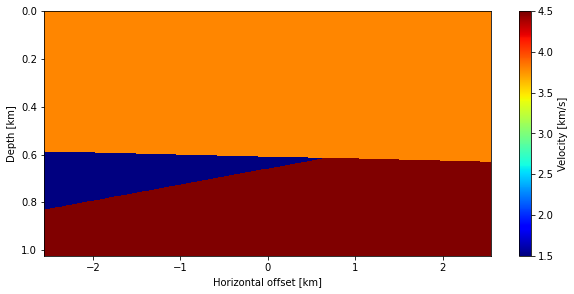

In [107]:
plt.close("all")
fig = plt.figure(figsize=(10, 4.5))

ax1 = fig.add_subplot(1, 1, 1)
#ax2 = fig.add_subplot(2, 1, 2)

#ax = fig.add_subplot(1, 1, 1, frameon=False)
#plt.tick_params(labelcolor='none', top=False, left=False, )
ax1.set_ylabel("Depth [km]")
ax1.set_xlabel("Horizontal offset [km]")
#ax1.set_xticklabels([])

qmesh = ax1.pcolormesh(
    watermod.nodes[:,:,0,0], 
    watermod.nodes[:,:,0,1], 
    watermod.values[:,:,0],
    cmap=plt.get_cmap("jet")
)

ax1.invert_yaxis()
cbar = fig.colorbar(qmesh, ax=(ax1,))
cbar.set_label("Velocity [km/s]")